<a href="https://colab.research.google.com/github/saraanan3/AI/blob/main/AI%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/saraanan3/AI/main/Classified_Age_and_Salary_Data.csv'
data = pd.read_csv(url)
data.head()


,Age Category,Salary Category,Purchased
0,Young,Low,0
1,Middle age,Low,0
2,Young,Low,0
3,Young,Low,0
4,Young,Low,0


Analysis

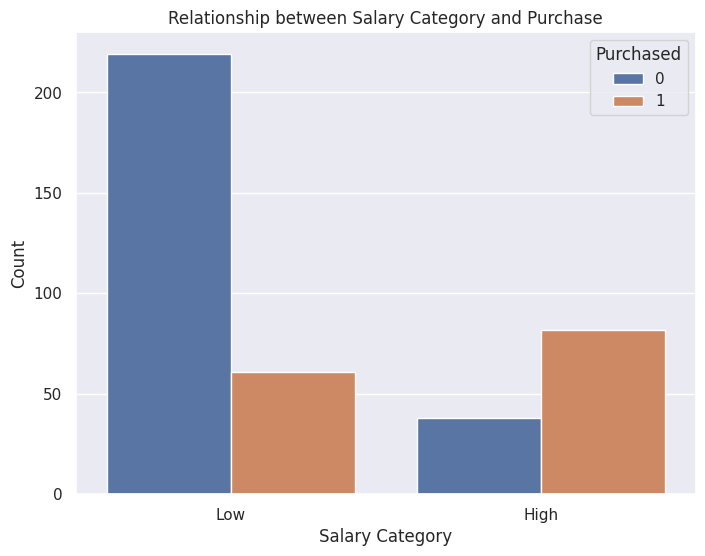

In [21]:


# Convert Age Category and Salary Category to ordinal values for plotting
age_order = {"Young": 1, "Middle age": 2, "Old": 3}
salary_order = {"Low": 0, "High": 1}

data['Age Ordinal'] = data['Age Category'].map(age_order)
data['Salary Ordinal'] = data['Salary Category'].map(salary_order)

# Plot 1: Relationship between Salary and Purchase
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Salary Category', hue='Purchased')
plt.title("Relationship between Salary Category and Purchase")
plt.xlabel("Salary Category")
plt.ylabel("Count")
plt.legend(title="Purchased", loc="upper right")
plt.show()





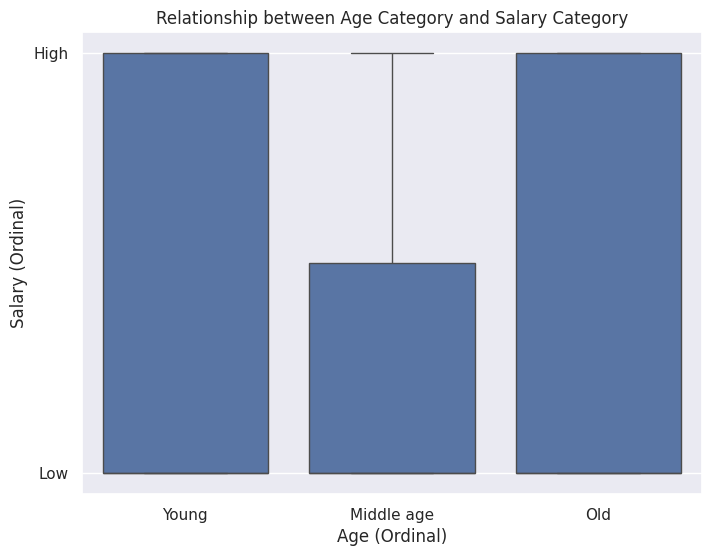

In [22]:
# Plot 3: Relationship between Age and Salary
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Age Ordinal', y='Salary Ordinal')
plt.title("Relationship between Age Category and Salary Category")
plt.xlabel("Age (Ordinal)")
plt.ylabel("Salary (Ordinal)")
plt.xticks(ticks=[0, 1, 2], labels=["Young", "Middle age", "Old"])
plt.yticks(ticks=[0, 1], labels=["Low", "High"])
plt.show()

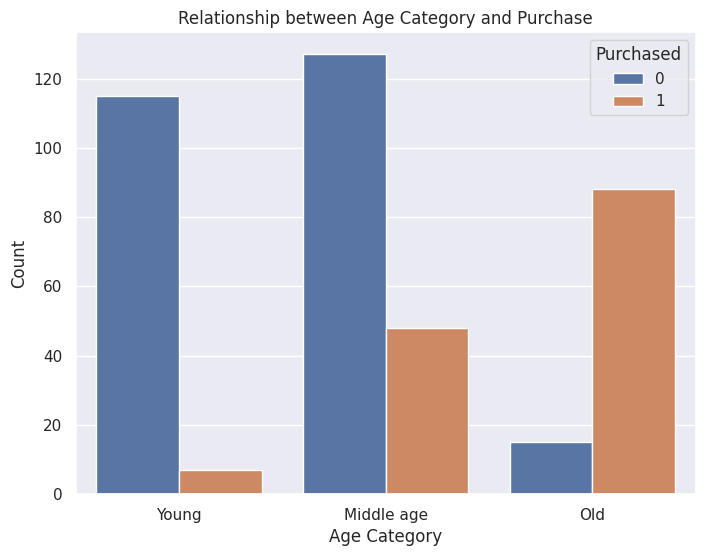

In [23]:
# Plot 2: Relationship between Age and Purchase
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Age Category', hue='Purchased')
plt.title("Relationship between Age Category and Purchase")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.legend(title="Purchased", loc="upper right")
plt.show()

construction of the Markov Model

In [2]:
import numpy as np
!pip install hmmlearn
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your dataset (upload the file or use a path in Colab)
df = pd.read_csv("Classified_Age_and_Salary_Data.csv")  # change to the file name as uploaded

# Combine Age Category and Salary Category to create distinct states
df['State'] = df['Age Category'] + '_' + df['Salary Category']

# Encode states and observations
state_encoder = LabelEncoder()
states = state_encoder.fit_transform(df['State'])
observations = df['Purchased'].values

# Initialize and fit HMM model
num_states = len(df['State'].unique())
model = hmm.MultinomialHMM(n_components=num_states, n_iter=100, random_state=42)
states_reshaped = states.reshape(-1, 1)
model.fit(states_reshaped, lengths=[len(states)])

# Find the index of "Young_Low" state
young_low_index = state_encoder.transform(['Young_Low'])[0]

# Extract transition probabilities from "Young_Low" to all other states
young_low_transitions = model.transmat_[young_low_index]

# Map probabilities back to state names
transition_probabilities = {
    state_encoder.inverse_transform([i])[0]: prob for i, prob in enumerate(young_low_transitions)
}

# Display the transition probabilities
print("Transition probabilities from 'Young_Low':")
for state, probability in transition_probabilities.items():
    print(f"{state}: {probability:.2f}")

# Access the number of states using 'n_components'
print("number of states = ", model.n_components) # Changed from len(model.keys()) to model.n_components

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Transition probabilities from 'Young_Low':
Middle age_High: 0.18
Middle age_Low: 0.00
Old_High: 0.60
Old_Low: 0.00
Young_High: 0.00
Young_Low: 0.21
number of states =  6
